In [39]:
import pandas as pd
import numpy as np

from parse import *
import os
import sklearn
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
#%matplotlib auto
import matplotlib.image as mpimg 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
from collections import defaultdict
import datetime
from datetime import timedelta
import argparse
import helper
from graphHelper import *

In [40]:
'''
cmd不方便调试，就建了一个类充当参数输入的接口
'''
class Myclass():
    MinCountOfPoints=6 #这里我没改，因为分长时间和短时间计算时，我手动一起调了（详见最后一个part）
    MinCountOfPointsForAll=-1
    SizeOfGrid='0.5' # 不需要调 
    figure='floorplan01.png'
    path='./results_tag0/'
    res='./figures/'
    bySecond=False
    IntervalOfMinutesOrSeconds=1 # 1分钟 1个点  
    setConfig=True #False

arguments=Myclass()


In [41]:

##########################################
# Choose Family
##########################################
family_config = helper.chooseFamily()

max_x = family_config.size[1]
min_x = family_config.size[0]
max_y = family_config.size[3]
min_y = family_config.size[2]


unit = float(arguments.SizeOfGrid)  #网格单元长宽m
column_num = int((max_x-min_x)//unit)
row_num = int((max_y-min_y)//unit)
map_img = mpimg.imread(arguments.figure)

# time epsilon to select the data point
epsilon = 15 #timedelta(minutes=10)
min_count = arguments.MinCountOfPoints

# define time
year = 2022
input_path = arguments.path
res_path = arguments.res
C = 0

==>Familiy choices :<==
1 :ParentsOfSun
2 :UncleOfSun
3 :AuntOfSun
Family of ParentsOfSun is chosen!

Trace familes:
	ParentsOfSun
	size of house : [-2.665, 13.505, -2.2, 10.44]
		Scenario=Shift
			zone 1: OutDoor
				{ x : [-1000.0,-0.0],y : [-1000.0,1000.0] => Delete
			zone 2: OutCanteen
				{ x : [-0.415,1.17],y : [6.773,1000.0] => MoveToDown
			zone kitchen: InKitchen
				{ x : [1.17,3.6],y : [6.785,10.44] => MoveToLeftLinearly
			zone 3: OutKitchen
				{ x : [1.17,3.6],y : [10.44,1000.0] => MoveToDown
			zone 4: OutKitchen
				{ x : [3.6,1000.0],y : [10.44,1000.0] => MoveToLeftDown
			zone 5: OutCanteen
				{ x : [3.6,1000.0],y : [5.37,6.785] => MoveToLeft
			zone 6: OutBalcony
				{ x : [-0.415,6.8],y : [-1000.0,-2.2] => MoveToUp
			zone 7: OutBedRoom
				{ x : [4.115,1000.0],y : [1.085,5.37] => MoveToLeft


In [42]:
"""
Read Data
"""
n = arguments.IntervalOfMinutesOrSeconds
if n == 1:
    if arguments.bySecond:
        end_suffix = '_dataBySecond.xlsx'
    else:
        end_suffix = '_dataByMinute.xlsx'
else:
    if arguments.bySecond:
        end_suffix = '_dataBy'+str(n)+'Seconds.xlsx'
    else:
        end_suffix = '_dataBy'+str(n)+'Minutes.xlsx'
    

# read files
files = [f for f in os.listdir(input_path) if f.endswith(end_suffix)]
# read data
print("Files read are :", files)
tags_order = []
all_points_array = []
dict_df = {}
list_df = []
# data collection for one
data_collection = []

if arguments.MinCountOfPointsForAll == -1:
    C = min_count * len(files)
else:
    C = arguments.MinCountOfPointsForAll

    

for f in files:
    df = pd.read_excel(open(input_path+f,'rb')) 

    # 修改门口坐标-tag0
    print(df)
    df.loc[(((abs(df['x值']-2.1175)<0.0001) &(abs(df['y值']-6.27)<0.0001))|
            ((abs(df['x值']-1.14875)<0.0001) &(abs(df['y值']-1.75875)<0.0001))|
            ((abs(df['x值']-1.4475845)<0.0001) &(abs(df['y值']-6.7912643)<0.0001))|
            ((abs(df['x值']-1.44)<0.0001) &(abs(df['y值']-6.77999999999999)<0.0001))|
            ((abs(df['x值']-1.54444444444445)<0.0001) &(abs(df['y值']-6.5888888888889)<0.0001))|
            ((abs(df['x值']-1.53142857142857)<0.0001) &(abs(df['y值']-6.65428571428572)<0.0001))|
            ((abs(df['x值']--0.04)<0.0001) &(abs(df['y值']-6.86000000000001)<0.0001))|
            ((abs(df['x值']-1.44666666666667)<0.0001) &(abs(df['y值']-6.57833333333332)<0.0001))|
            ((abs(df['x值']-1.364)<0.0001) &(abs(df['y值']-5.886)<0.0001))|
            ((abs(df['x值']-2.05)<0.0001) &(abs(df['y值']-7.88333333333333)<0.0001))|
            ((abs(df['x值']-1.81)<0.0001) &(abs(df['y值']-7.94)<0.0001))|
            ((abs(df['x值']--0.025)<0.0001) &(abs(df['y值']-5.41833333333333)<0.0001))|
            ((abs(df['x值']--0.04)<0.0001) &(abs(df['y值']-7.05500000000001)<0.0001))|
            ((abs(df['x值']-0.38)<0.0001) &(abs(df['y值']-7.89999999999999)<0.0001))|
            ((abs(df['x值']-0.35)<0.0001) &(abs(df['y值']-7.505)<0.0001))|
            ((abs(df['x值']-1.11)<0.0001) &(abs(df['y值']-6.66000000000001)<0.0001))|
            ((abs(df['x值']-1.40833333333333)<0.0001) &(abs(df['y值']-6.71499999999999)<0.0001))|
            ((abs(df['x值']-1.34714285714286)<0.0001) &(abs(df['y值']-6.56857142857143)<0.0001))|
            ((abs(df['x值']-1.56111111111111)<0.0001) &(abs(df['y值']-6.63333333333333)<0.0001))|
            ((abs(df['x值']-1.18)<0.0001) &(abs(df['y值']-6.86200000000001)<0.0001))|
            ((abs(df['x值']-0.56125)<0.0001) &(abs(df['y值']-3.25749999999999)<0.0001))|
            ((abs(df['x值']-1.5325)<0.0001) &(abs(df['y值']-6.5675)<0.0001))|
            ((abs(df['x值']-0.817777777777778)<0.0001) &(abs(df['y值']-6.74333333333334)<0.0001))|
            ((abs(df['x值']-1.215)<0.0001) &(abs(df['y值']-6.83)<0.0001))|
            ((abs(df['x值']-1.343)<0.0001) &(abs(df['y值']-6.68599999999999)<0.0001))|
            ((abs(df['x值']-1.35333333333333)<0.0001) &(abs(df['y值']-6.66166666666667)<0.0001))|
            ((abs(df['x值']-0.954444444444446)<0.0001) &(abs(df['y值']-6.77666666666666)<0.0001))|
            ((abs(df['x值']-1.28)<0.0001) &(abs(df['y值']-6.62)<0.0001))|
            ((abs(df['x值']-1.316)<0.0001) &(abs(df['y值']-6.656)<0.0001))|
            ((abs(df['x值']-1.16)<0.0001) &(abs(df['y值']-2.135)<0.0001))|
            ((abs(df['x值']-1.21142857142857)<0.0001) &(abs(df['y值']-6.85142857142858)<0.0001))|
            ((abs(df['x值']-1.418)<0.0001) &(abs(df['y值']-6.916)<0.0001))|
            ((abs(df['x值']-1.2475)<0.0001) &(abs(df['y值']-1.9625)<0.0001))|
            ((abs(df['x值']-1.58)<0.0001) &(abs(df['y值']-6.62)<0.0001))|
            ((abs(df['x值']-1.552)<0.0001) &(abs(df['y值']-6.85199999999999)<0.0001))|
            ((abs(df['x值']-1.47)<0.0001) &(abs(df['y值']-6.35)<0.0001))|
            ((abs(df['x值']-1.146)<0.0001) &(abs(df['y值']-6.39600000000001)<0.0001))|
            ((abs(df['x值']-1.31)<0.0001) &(abs(df['y值']-6.43666666666667)<0.0001))|
            ((abs(df['x值']-1.57444444444444)<0.0001) &(abs(df['y值']-6.56888888888888)<0.0001))|
            ((abs(df['x值']-1.08333333333333)<0.0001) &(abs(df['y值']-6.53333333333334)<0.0001))
            ), 'x值'] = 3.0
           
    df.loc[((abs(df['x值'] - 3.0)<0.0001) & 
            ((abs(df['y值']-6.27)<0.0001)| 
             (abs(df['y值']-1.75875)<0.0001)|
             (abs(df['y值']-6.7912643)<0.0001)|
             (abs(df['y值']-6.77999999999999)<0.0001)|
             (abs(df['y值']-6.5888888888889)<0.0001)|
             (abs(df['y值']-6.77999999999999)<0.0001)|
             (abs(df['y值']-6.5888888888889)<0.0001)|
             (abs(df['y值']-6.65428571428572)<0.0001)|
             (abs(df['y值']-6.86000000000001)<0.0001)|
             (abs(df['y值']-6.57833333333332)<0.0001)|
             (abs(df['y值']-5.886)<0.0001)|
             (abs(df['y值']-7.88333333333333)<0.0001)|
             (abs(df['y值']-7.94)<0.0001)|
             (abs(df['y值']-5.41833333333333)<0.0001)|
             (abs(df['y值']-7.05500000000001)<0.0001)|
             (abs(df['y值']-7.89999999999999)<0.0001)|
             (abs(df['y值']-7.505)<0.0001)|
             (abs(df['y值']-6.66000000000001)<0.0001)|
             (abs(df['y值']-6.71499999999999)<0.0001)|
             (abs(df['y值']-6.56857142857143)<0.0001)|
             (abs(df['y值']-6.63333333333333)<0.0001)|
             (abs(df['y值']-6.86200000000001)<0.0001)|
             (abs(df['y值']-3.25749999999999)<0.0001)|
             (abs(df['y值']-6.5675)<0.0001)|
             (abs(df['y值']-6.83)<0.0001)|
             (abs(df['y值']-6.74333333333334)<0.0001)|
             (abs(df['y值']-6.68599999999999)<0.0001)|
             (abs(df['y值']-6.66166666666667)<0.0001)|
             (abs(df['y值']-6.77666666666666)<0.0001)|
             (abs(df['y值']-6.62)<0.0001)|
             (abs(df['y值']-6.656)<0.0001)|
             (abs(df['y值']-2.135)<0.0001)|
             (abs(df['y值']-6.85142857142858)<0.0001)|
             (abs(df['y值']-6.916)<0.0001)|
             (abs(df['y值']-1.9625)<0.0001)|
             (abs(df['y值']-6.62)<0.0001)|
             (abs(df['y值']-6.85199999999999)<0.0001)|
             (abs(df['y值']-6.35)<0.0001)|
             (abs(df['y值']-6.39600000000001)<0.0001)|
             (abs(df['y值']-6.43666666666667)<0.0001)|
             (abs(df['y值']-6.56888888888888)<0.0001)|
             (abs(df['y值']-6.53333333333334)<0.0001)
             )),'y值'] = 5.0

    ori_df = df.copy()# store the non-shifted points
    # shift data
    if arguments.setConfig :
        print("==========>Start Shifting<============")
        df = shift(family_config,df)
        print("==========>End Shifting<============")
        # print(df_temp)

    # one copy of df
    df_copy = df.copy()

    parsed = parse("{}_{}_{}",f)
    my_date = str(year)+'-'+parsed[1][:2]+'-'+parsed[1][2:]
    date = str(dt.datetime.strptime(my_date, '%Y-%m-%d').date())

    points = []
    old_points = []
    key = parsed[0]+"_"+my_date 

    for i in range(len(df['hour'])):
        point = [df['x值'][i],df['y值'][i]]
        old_point = [ori_df['x值'][i],ori_df['y值'][i]]
        points.append(point)
        old_points.append(old_point)
        data_collection.append(point)
            
        # define new time for all in one
        # TODO : if necessary, to change all dataframe time
        new_time = pd.to_datetime(date + " " + df['time'][i].strftime("%H:%M:%S"))
        #df_copy['time'][i] = new_time
        df_copy.at[i,'time'] = new_time

    points_array = np.array(points)
    old_points_array = np.array(old_points)
    
    # create non-shifted scatter
    createScatter(old_points_array,key,map_img,res_path,max_x,min_x,max_y,min_y)
    #createScatter(points_array,key,map_img,res_path,max_x,min_x,max_y,min_y)

    tags_order.append(parsed[0])
    all_points_array.append(points_array)
        
    dict_df[key] =df_copy # change the time
    #print(all_points_array)
    list_df.append(df_copy)
    
print("==========>Finish Reading<============")
'''
dict_df:
key: 'tag0_2022_2_19'等
data: 当天的时间-点值 dataframe
'''

Files read are : ['tag0_0207_dataByMinute.xlsx', 'tag0_0211_dataByMinute.xlsx', 'tag0_0213_dataByMinute.xlsx', 'tag0_0202_dataByMinute.xlsx', 'tag0_0208_dataByMinute.xlsx', 'tag0_0205_dataByMinute.xlsx', 'tag0_0204_dataByMinute.xlsx', 'tag0_0210_dataByMinute.xlsx', 'tag0_0203_dataByMinute.xlsx', 'tag0_0206_dataByMinute.xlsx', 'tag0_0212_dataByMinute.xlsx', 'tag0_0209_dataByMinute.xlsx']
     hour  minute      time  second        x值        y值
0       8      29  08:29:00    54.0  3.054000  6.464179
1       8      30  08:30:00    29.5  1.191444  5.549134
2       8      31  08:31:00    29.5  2.541809  6.910877
3       8      32  08:32:00    29.5  2.624581  6.069367
4       8      33  08:33:00    29.5  1.871939  4.309019
..    ...     ...       ...     ...       ...       ...
839    22      28  22:28:00    29.5  2.565653  4.496686
840    22      29  22:29:00    29.5  2.286463  4.259578
841    22      30  22:30:00    29.5  1.419988  1.377875
842    22      31  22:31:00    29.5  1.631734  1.3

"\ndict_df:\nkey: 'tag0_2022_2_19'等\ndata: 当天的时间-点值 dataframe\n"

In [43]:
# collect all data by concatinate all dataframe to one
data_collection_array = np.array(data_collection)
df_week = pd.concat(list_df,sort=False)
# NOTE : necessary ! to remove the index for series in dataframe
df_week.reset_index(drop=True, inplace=True) 
print("read files :",files)
print(len(all_points_array))

nb_record = len(all_points_array)

# For sub plots(shifted)
# closed for now
"""
fig = plt.figure(figsize = (12,nb_record//4*3)) # NOTE: 可以修改出图尺寸
# create scatter
for i in range(0,nb_record):
    ax = plt.subplot(math.ceil(nb_record/4),4,i+1)
    # NOTE: 3 rows, and 8 columns
    #ax.text(0.5, 0.5, str((3,8,i)), fontsize=18, ha='center')
    #plt.title(my_date)
    ax.scatter(all_points_array[i][:,0],all_points_array[i][:,1],s=20)
"""
# NOTE : necessary !
createPath(res_path)
#fig.savefig(res_path+"shifted_scatter.png",dpi=300)
#plt.close(fig)

# For all in one plot
# fig = plt.figure(figsize = (15, 15)) # NOTE: 可以修改出图尺寸
# create scatter


read files : ['tag0_0207_dataByMinute.xlsx', 'tag0_0211_dataByMinute.xlsx', 'tag0_0213_dataByMinute.xlsx', 'tag0_0202_dataByMinute.xlsx', 'tag0_0208_dataByMinute.xlsx', 'tag0_0205_dataByMinute.xlsx', 'tag0_0204_dataByMinute.xlsx', 'tag0_0210_dataByMinute.xlsx', 'tag0_0203_dataByMinute.xlsx', 'tag0_0206_dataByMinute.xlsx', 'tag0_0212_dataByMinute.xlsx', 'tag0_0209_dataByMinute.xlsx']
12
Directory  ./figures/  already exists


In [44]:
'''
shifted_scatter_allIn 数据清理后，总共14天的散点图
'''
fig,ax = plt.subplots(figsize=(int(max_x-min_x),int(max_y-min_y)))
ax.scatter(data_collection_array[:,0],data_collection_array[:,1],s=20) # data_collection_array: 第一列：x;第二列：y 排数=点数
plt.imshow(map_img,zorder = 0, extent=[min_x,max_x,min_y,max_y])
fig.savefig(res_path+"shifted_scatter_allInOne.png",dpi=300)
plt.close(fig)

In [45]:
number_cluster={}  # key=日期 value=当天的聚类数
totaltimes=pd.DataFrame(columns=['date','TimeAtHome']) # 每
dict_zones_dict={}

In [46]:
'''
统计每天的在家时间
'''
for key in dict_df.keys():
    data = collectData(dict_df,key)
    groups,grids = createGrid(data,key,column_num,row_num,max_x,min_x,max_y,min_y)
    data=WashData(data)
    # 记录每一天的在家时间
    totaltime=len(data)
    new_time=pd.DataFrame([[key, totaltime]],columns=['date','TimeAtHome'])
    totaltimes=totaltimes.append(new_time,ignore_index=True)

print(totaltimes)


    

After Collect Data:
                    time         x         y
0   2022-02-07 08:29:00  3.054000  6.464179
1   2022-02-07 08:30:00  1.191444  5.549134
2   2022-02-07 08:31:00  2.466070  6.910877
3   2022-02-07 08:32:00  2.624581  6.069367
4   2022-02-07 08:33:00  1.871939  4.309019
..                  ...       ...       ...
839 2022-02-07 22:28:00  2.565653  4.496686
840 2022-02-07 22:29:00  2.286463  4.259578
841 2022-02-07 22:30:00  1.419988  1.377875
842 2022-02-07 22:31:00  1.631734  1.364558
843 2022-02-07 22:32:00  1.630561  1.725306

[844 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-11 08:12:00  1.424158  2.969921
1   2022-02-11 08:13:00  2.830267  4.994131
2   2022-02-11 08:14:00  3.123333  5.240000
3   2022-02-11 08:15:00  3.123333  5.240000
4   2022-02-11 08:16:00  3.123333  5.240000
..                  ...       ...       ...
900 2022-02-11 23:12:00  1.891932  0.600085
901 2022-02-11 23:13:00  1.880769  0.614833
902 2022-0

/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-02-02 07:35:00  2.910135  7.072932
1   2022-02-02 07:36:00  2.657742  7.693834
2   2022-02-02 07:37:00  2.976735  7.566243
3   2022-02-02 07:38:00  2.660799  8.175517
4   2022-02-02 07:39:00  2.298434  7.753170
..                  ...       ...       ...
925 2022-02-02 23:00:00  1.938902  0.486976
926 2022-02-02 23:01:00  1.867671  0.558008
927 2022-02-02 23:02:00  1.837500  0.560000
928 2022-02-02 23:03:00  1.582927  0.934938
929 2022-02-02 23:04:00  1.359832  1.873971

[930 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-08 08:20:00  3.211042  6.311671
1   2022-02-08 08:21:00  2.707274  8.899477
2   2022-02-08 08:22:00  3.381425  8.702887
3   2022-02-08 08:23:00  3.078739  7.380699
4   2022-02-08 08:24:00  2.531599  9.230872
..                  ...       ...       ...
852 2022-02-08 22:32:00  1.837956  1.049354
853 2022-02-08 22:33:00  1.947991  1.030298
854 2022-0

/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-02-04 08:23:00  3.430200  4.866200
1   2022-02-04 08:24:00  2.605861  4.863248
2   2022-02-04 08:25:00  3.484452  8.329867
3   2022-02-04 08:26:00  3.448422  8.713333
4   2022-02-04 08:27:00  3.448422  8.713333
..                  ...       ...       ...
711 2022-02-04 20:14:00  2.016896  1.053406
712 2022-02-04 20:15:00  2.091500  1.027933
713 2022-02-04 20:16:00  2.059342  0.935821
714 2022-02-04 20:17:00  2.057500  0.868750
715 2022-02-04 20:18:00  1.984716  1.037396

[716 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-10 08:24:00  1.513992  1.715532
1   2022-02-10 08:25:00  1.201825  1.051422
2   2022-02-10 08:26:00 -0.500000  3.000000
3   2022-02-10 08:27:00 -0.500000  3.000000
4   2022-02-10 08:28:00 -0.500000  3.000000
..                  ...       ...       ...
869 2022-02-10 22:53:00  1.217733  0.569677
870 2022-02-10 22:54:00  1.057583  0.449800
871 2022-0

/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-02-06 07:56:00  1.682002  1.471028
1   2022-02-06 07:57:00  1.569905  1.245481
2   2022-02-06 07:58:00  2.699949  3.575142
3   2022-02-06 07:59:00  3.575000  4.650000
4   2022-02-06 08:00:00  3.575000  4.650000
..                  ...       ...       ...
948 2022-02-06 23:44:00  2.120000  1.215000
949 2022-02-06 23:45:00  2.120000  1.215000
950 2022-02-06 23:46:00  2.120000  1.215000
951 2022-02-06 23:47:00  2.120000  1.215000
952 2022-02-06 23:48:00  0.860138  2.492470

[953 rows x 3 columns]
After Collect Data:
                   time         x         y
0  2022-02-12 07:49:00  2.822584  6.745368
1  2022-02-12 07:50:00  3.004583  7.328625
2  2022-02-12 07:51:00  3.600000  9.309862
3  2022-02-12 07:52:00  2.372359  4.355897
4  2022-02-12 07:53:00  3.600000  8.704304
5  2022-02-12 07:54:00  2.207027  4.373817
6  2022-02-12 07:55:00  3.492233  8.392067
7  2022-02-12 07:56:00  3.214957  8.110771
8  2022-02-12 07:57

/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_43102/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


                    time         x         y
0    2022-02-07 08:29:00  3.054000  6.464179
1    2022-02-07 08:30:00  1.191444  5.549134
2    2022-02-07 08:31:00  2.466070  6.910877
3    2022-02-07 08:32:00  2.624581  6.069367
4    2022-02-07 08:33:00  1.871939  4.309019
...                  ...       ...       ...
9198 2022-02-09 22:49:00  2.038864  1.038186
9199 2022-02-09 22:50:00  1.977453  1.029235
9200 2022-02-09 22:51:00  2.096200  1.075524
9201 2022-02-09 22:52:00  1.973830  1.096821
9202 2022-02-09 22:53:00  1.904401  1.506270

[9203 rows x 3 columns]
0.8652889202502546
[0.6863459537361829, 0.8299911311541684, 0.8553595601848354, 0.8652889202502546, 0.848856960996035]
2022-02-07 09:45:00 2022-02-07 09:09:00 0 days 00:36:00
2022-02-11 08:44:00 2022-02-07 09:49:00 3 days 22:55:00
2022-02-11 12:46:00 2022-02-11 09:11:00 0 days 03:35:00
2022-02-11 13:20:00 2022-02-11 12:49:00 0 days 00:31:00
2022-02-11 19:11:00 2022-02-11 18:14:00 0 days 00:57:00
2022-02-11 19:36:00 2022-02-11 19:11

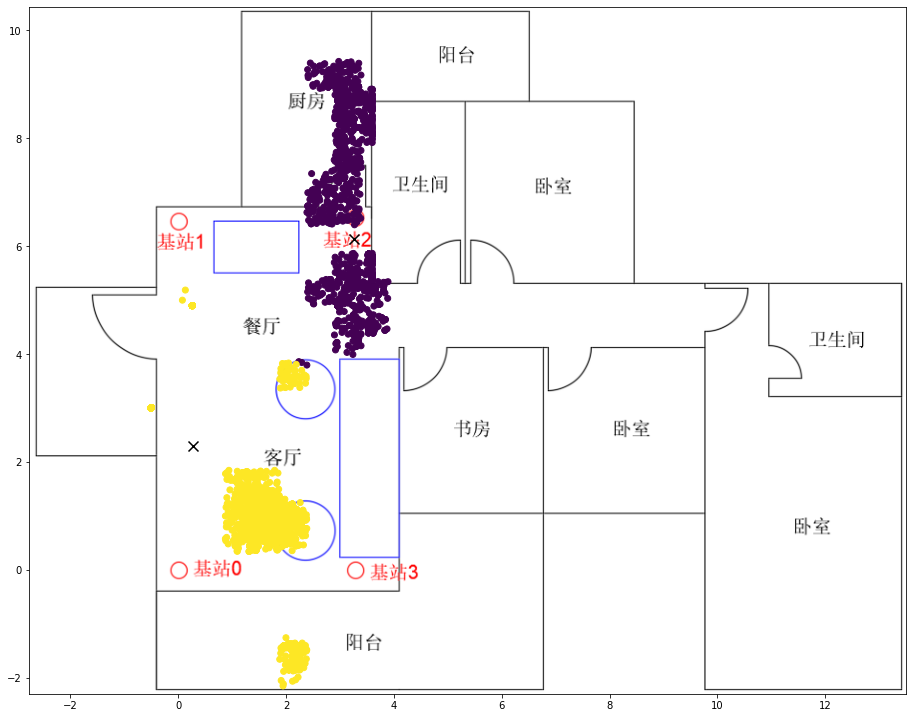

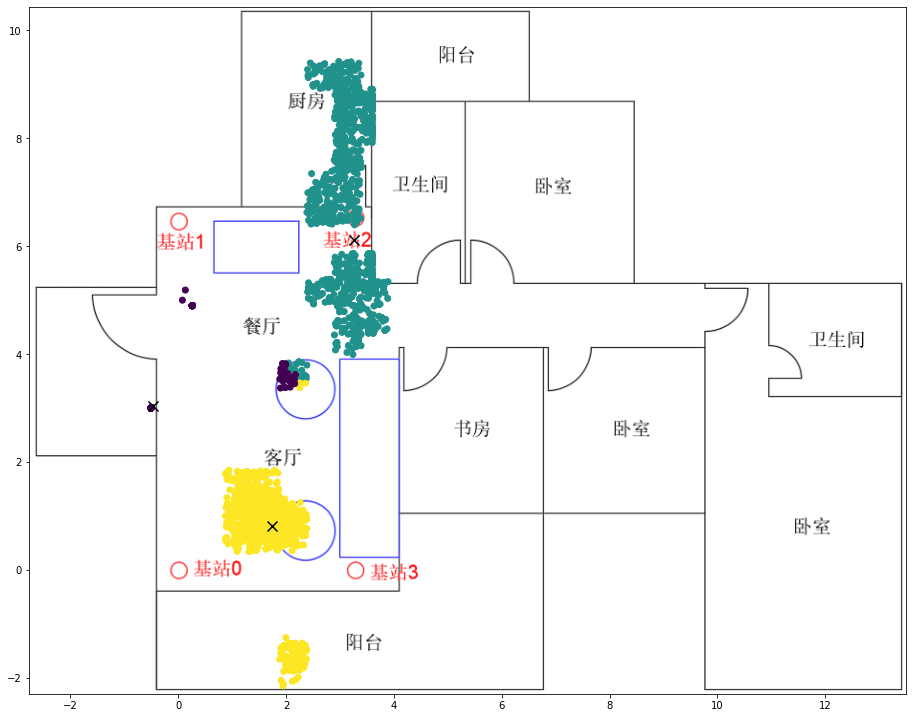

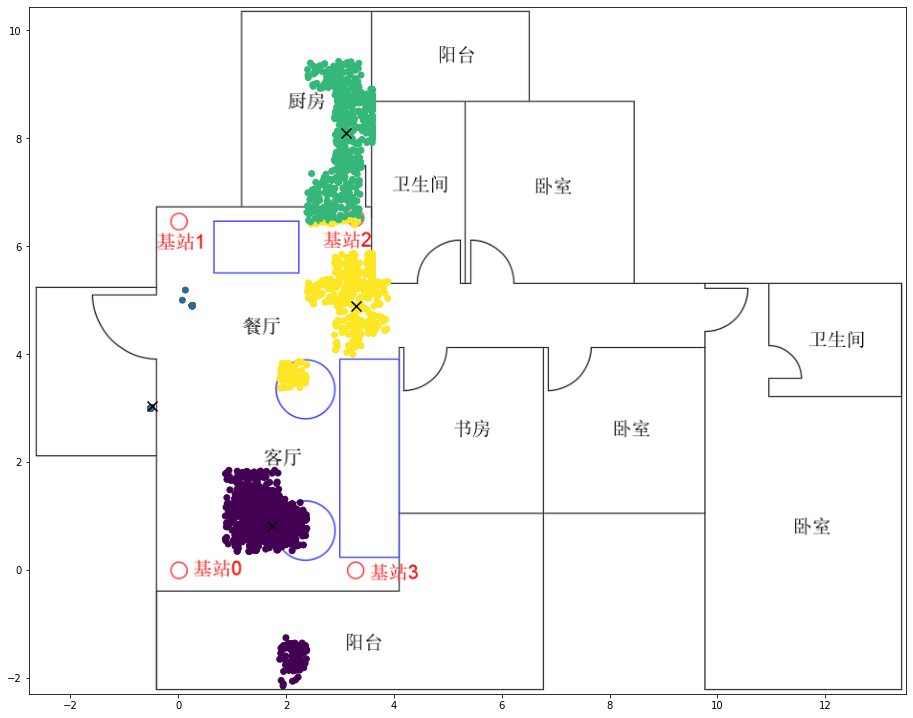

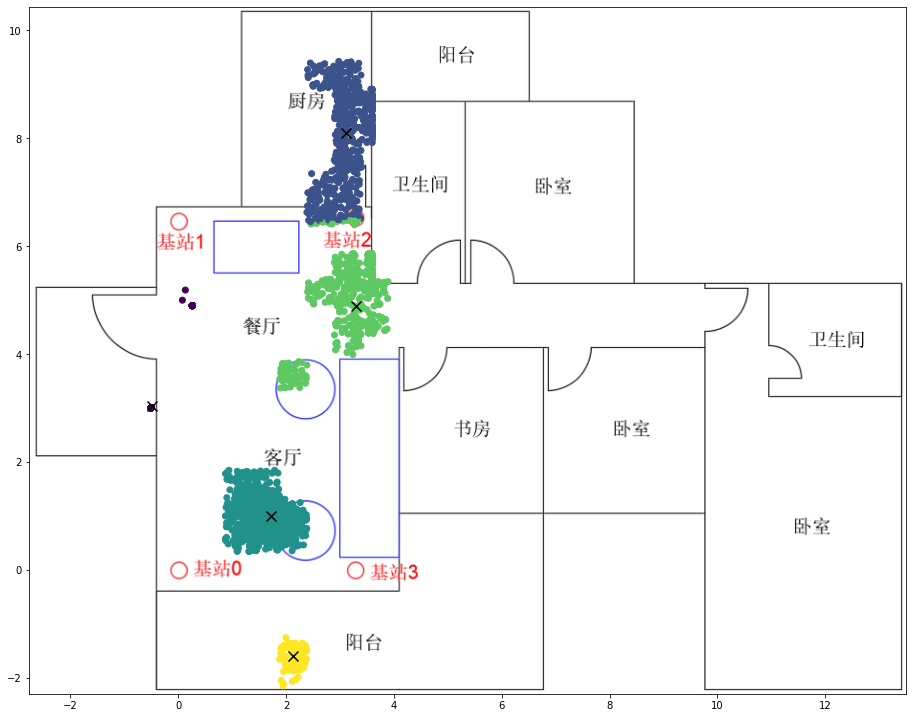

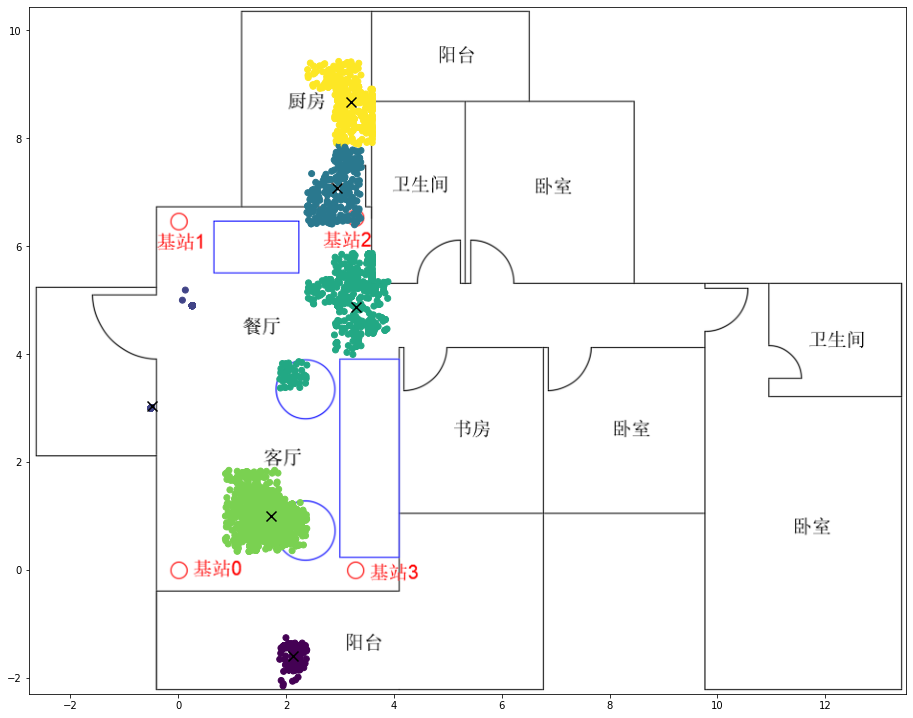

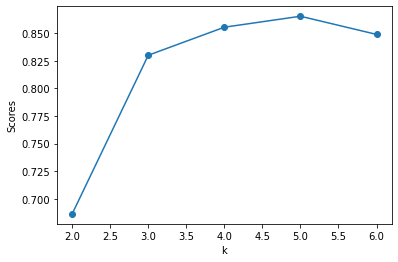

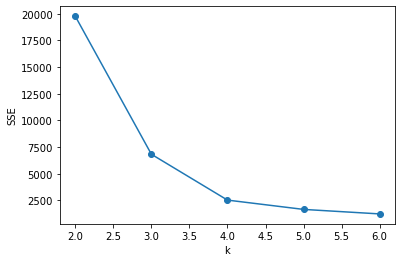

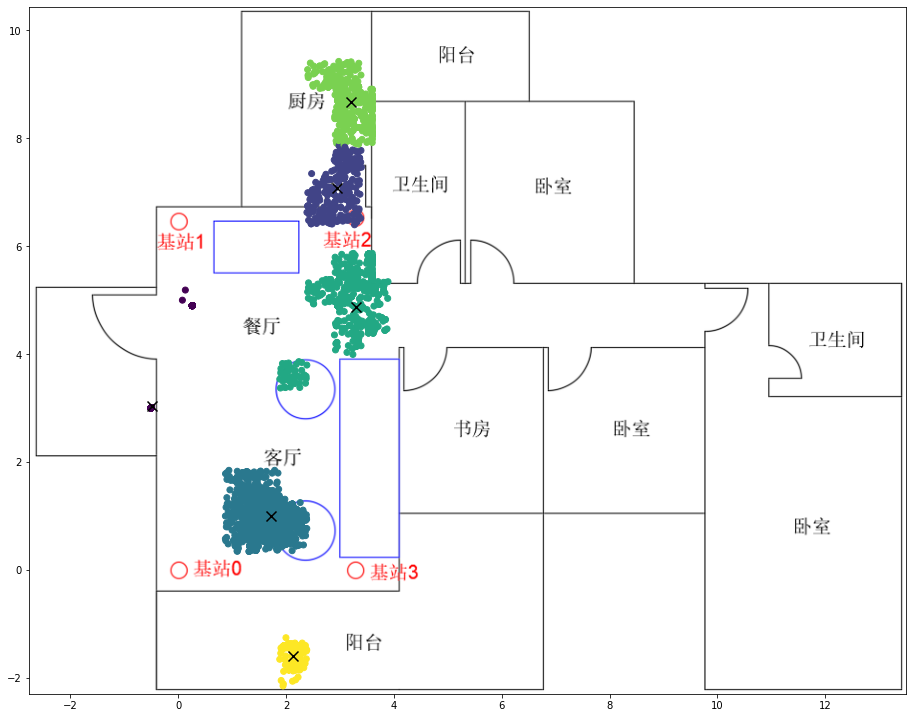

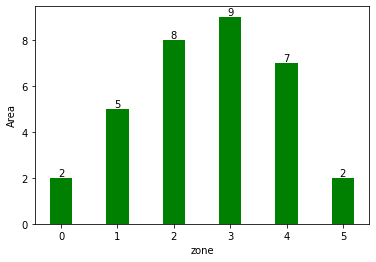

In [47]:
'''
整个14天的分区表示——聚类+画成热力图
'''
key="All"
data_allInOne = collectDataAllInOne(df_week)
groups,grids = createGrid(data_allInOne,key,column_num,row_num,max_x,min_x,max_y,min_y)
createHeatmap(grids,"heatmap_allInOne",map_img,res_path,unit,max_x,min_x,max_y,min_y)

# create excel writer object 输出每个点对应的网格
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
data_allInOne.to_excel(writer)
# save the excel
writer.save()
    
 # 删去点数小于min_count的网格中的点——剩余的点更加集中，便于聚类
choice_data_all=choose_spots(data_allInOne,groups,40)
x=choice_data_all['x']
y=choice_data_all['y']
# centers: 聚类后每一类的中心点坐标——根据中心点划定zone的范围
centers_all,y_pre_all = K_m(x,y,key,number_cluster,map_img,res_path,max_x,min_x,max_y,min_y)
choice_data_all['zone']=y_pre_all


dict_zones_all= get_dict_zones(choice_data_all,number_cluster[key])
zones_info_forall=get_zone_info("All",dict_zones_all,res_path)
intervals_in_zones,details = getTimeIntervalsForZones(dict_zones_all,data_allInOne,epsilon)

new_grids = createHeatmapByTime(dict_zones_all,"heatmap_allInOne",map_img,res_path,row_num,column_num,unit,max_x,min_x,max_y,min_y,groups)
createHeatmapByTime2(new_grids,"heatmap_allInOne",map_img,res_path,unit,max_x,min_x,max_y,min_y)


In [48]:


'''
按在家时间长短分为两类分析
首先处理数据，将数据分为两类并整合
'''
    
list_long_df=[]
list_short_df=[]
list_mid_df=[]

for idx,row in totaltimes.iterrows():
    if row['TimeAtHome']>600: # 10h以上 长时间
        list_long_df.append(collectData(dict_df,row['date']))
    elif row['TimeAtHome']<300: # 5h以下 短时间
        list_short_df.append(collectData(dict_df,row['date']))
    else:
        list_mid_df.append(collectData(dict_df,row['date']))

df_long = pd.concat(list_long_df,sort=False)
df_long.reset_index(drop=True, inplace=True) 

df_short = pd.concat(list_short_df,sort=False)
df_short.reset_index(drop=True, inplace=True) 

df_mid = pd.concat(list_mid_df,sort=False)
df_mid.reset_index(drop=True, inplace=True) 


After Collect Data:
                    time         x         y
0   2022-02-07 08:29:00  3.054000  6.464179
1   2022-02-07 08:30:00  1.191444  5.549134
2   2022-02-07 08:31:00  2.466070  6.910877
3   2022-02-07 08:32:00  2.624581  6.069367
4   2022-02-07 08:33:00  1.871939  4.309019
..                  ...       ...       ...
839 2022-02-07 22:28:00  2.565653  4.496686
840 2022-02-07 22:29:00  2.286463  4.259578
841 2022-02-07 22:30:00  1.419988  1.377875
842 2022-02-07 22:31:00  1.631734  1.364558
843 2022-02-07 22:32:00  1.630561  1.725306

[844 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-11 08:12:00  1.424158  2.969921
1   2022-02-11 08:13:00  2.830267  4.994131
2   2022-02-11 08:14:00  3.123333  5.240000
3   2022-02-11 08:15:00  3.123333  5.240000
4   2022-02-11 08:16:00  3.123333  5.240000
..                  ...       ...       ...
900 2022-02-11 23:12:00  1.891932  0.600085
901 2022-02-11 23:13:00  1.880769  0.614833
902 2022-0

                  time         x         y  label
0  2022-02-12 07:49:00  2.822584  6.745368    555
1  2022-02-12 07:50:00  3.004583  7.328625    588
2  2022-02-12 07:51:00  3.600000  9.309862    717
3  2022-02-12 07:52:00  2.372359  4.355897    394
4  2022-02-12 07:53:00  3.600000  8.704304    685
5  2022-02-12 07:54:00  2.207027  4.373817    426
6  2022-02-12 07:55:00  3.492233  8.392067    653
7  2022-02-12 07:56:00  3.214957  8.110771    652
8  2022-02-12 07:57:00  1.806892  0.927689    201
9  2022-02-12 07:58:00  2.114582  0.353545    170
10 2022-02-12 07:59:00  3.600000  6.898872    557
11 2022-02-12 08:00:00  3.600000  9.906250    749
12 2022-02-12 08:01:00  3.600000  9.885419    749
13 2022-02-12 08:02:00  3.443460  7.698200    621
14 2022-02-12 08:03:00  3.417143  8.474286    685
15 2022-02-12 08:04:00  3.600000  9.047163    717
16 2022-02-12 08:05:00  3.600000  9.244825    717
17 2022-02-12 08:06:00  3.549433  7.123440    589
18 2022-02-12 08:07:00  1.857876  1.010217    201


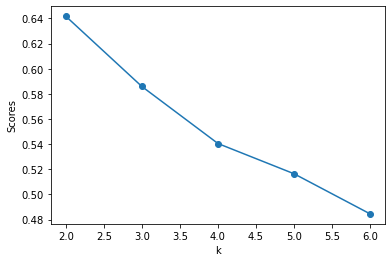

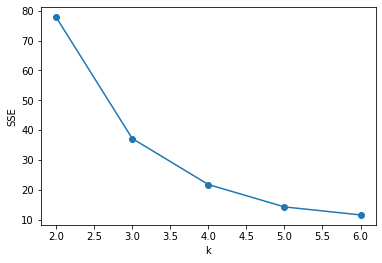

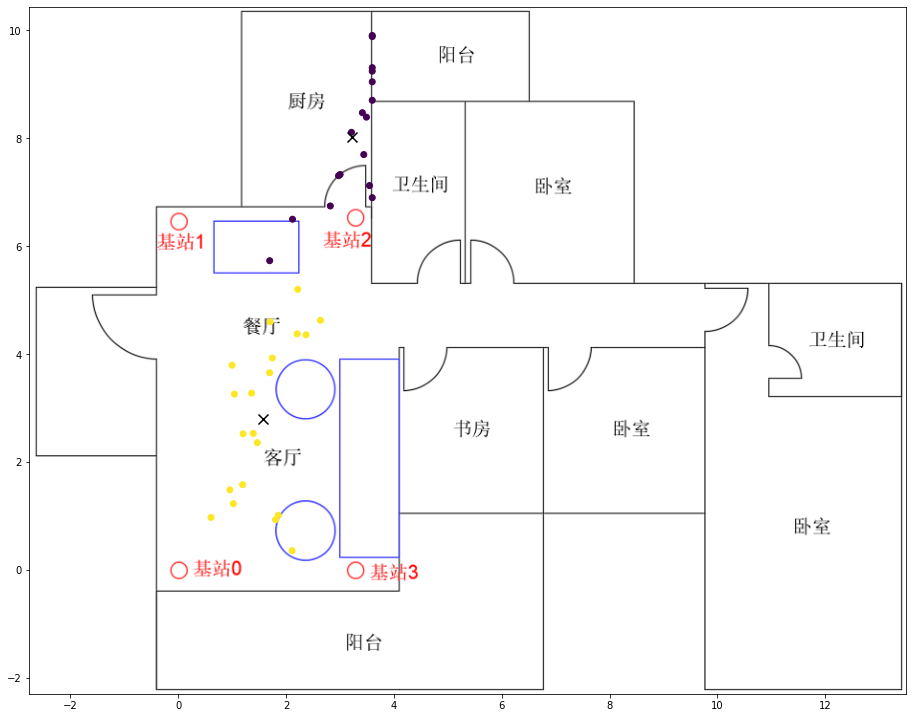

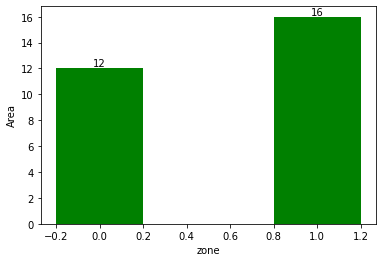

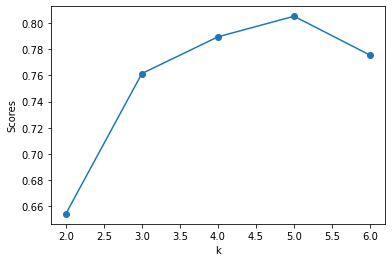

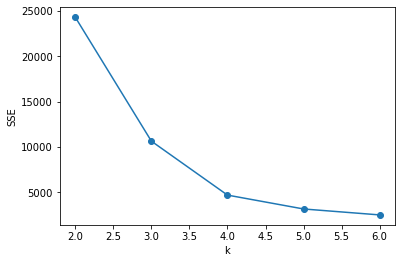

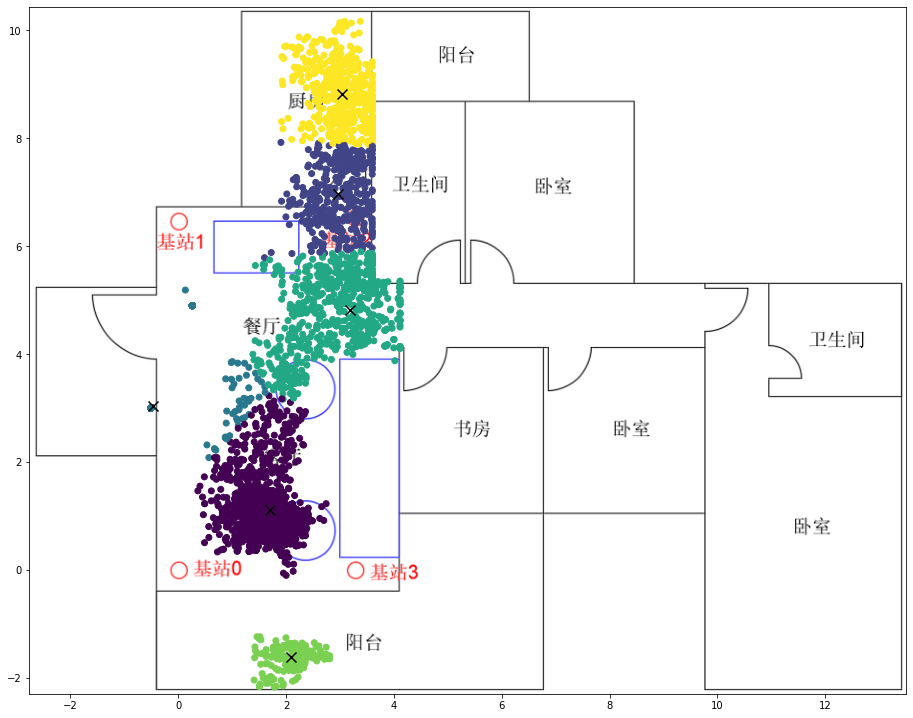

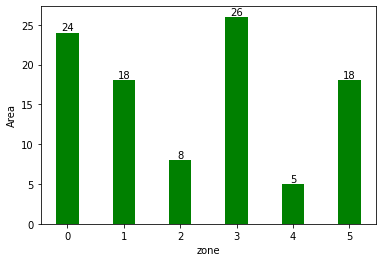

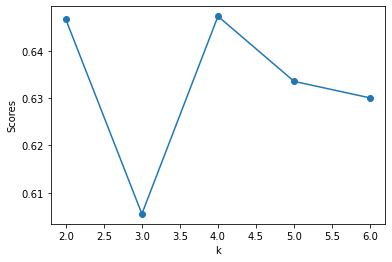

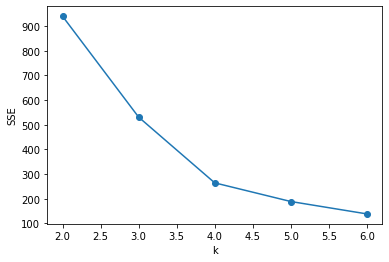

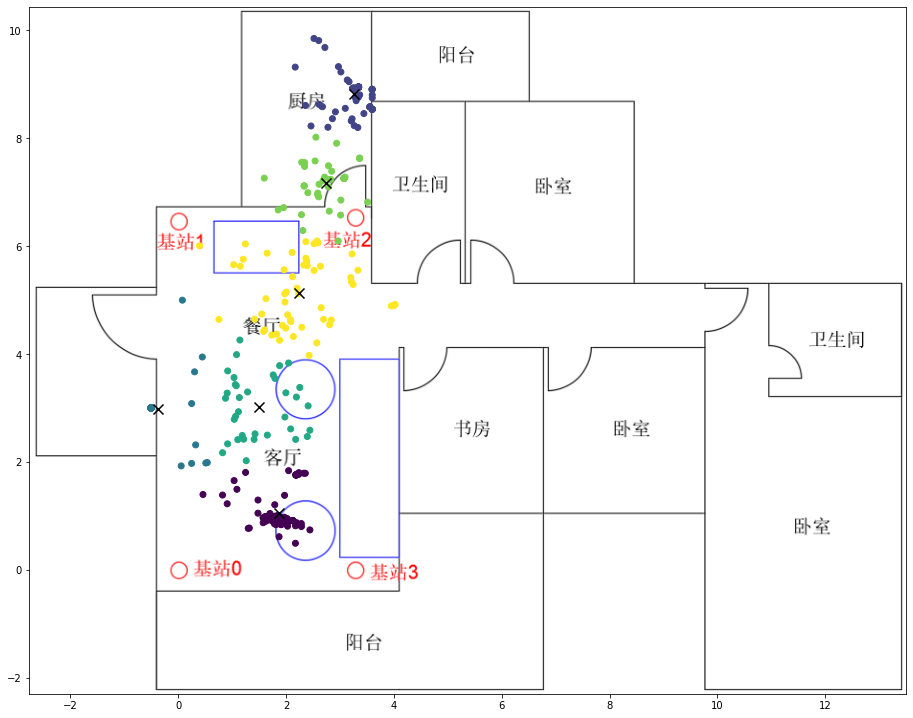

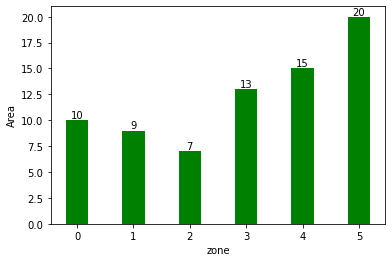

In [49]:
'''
短时段在家的情况：totaltimes[key]<300
'''
zones_info_short=FinalAnalysis(df_short,"short",len(list_short_df)*1,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups)

'''
长时段在家的情况：totaltimes[key]>600
'''
zones_info_long=FinalAnalysis(df_long,"long",len(list_long_df)*1,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups)

print("===========> DONE <===========")

'''
中时段在家情况：totaltime[key]∈[300,600]
'''
zones_info_mid=FinalAnalysis(df_mid,"mid",len(list_mid_df)*1,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups)

print("===========> DONE <===========")



In [50]:

'''
短时段在家的情况：totaltimes[key]<300
'''
zones_info_short2=FinalAnalysis(df_short,"short",len(list_short_df)*5,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups,withTimeLine=1)

'''
长时段在家的情况：totaltimes[key]>600
'''
zones_info_long2=FinalAnalysis(df_long,"long",len(list_long_df)*5,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups,withTimeLine=1)

print("===========> DONE <===========")

'''
中时段在家情况：totaltime[key]∈[300,600]
'''
zones_info_mid2=FinalAnalysis(df_mid,"mid",len(list_mid_df)*5,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups,withTimeLine=1)

print("===========> DONE <===========")



                  time         x         y  label
0  2022-02-12 07:49:00  2.822584  6.745368    555
1  2022-02-12 07:50:00  3.004583  7.328625    588
2  2022-02-12 07:51:00  3.600000  9.309862    717
3  2022-02-12 07:52:00  2.372359  4.355897    394
4  2022-02-12 07:53:00  3.600000  8.704304    685
5  2022-02-12 07:54:00  2.207027  4.373817    426
6  2022-02-12 07:55:00  3.492233  8.392067    653
7  2022-02-12 07:56:00  3.214957  8.110771    652
8  2022-02-12 07:57:00  1.806892  0.927689    201
9  2022-02-12 07:58:00  2.114582  0.353545    170
10 2022-02-12 07:59:00  3.600000  6.898872    557
11 2022-02-12 08:00:00  3.600000  9.906250    749
12 2022-02-12 08:01:00  3.600000  9.885419    749
13 2022-02-12 08:02:00  3.443460  7.698200    621
14 2022-02-12 08:03:00  3.417143  8.474286    685
15 2022-02-12 08:04:00  3.600000  9.047163    717
16 2022-02-12 08:05:00  3.600000  9.244825    717
17 2022-02-12 08:06:00  3.549433  7.123440    589
18 2022-02-12 08:07:00  1.857876  1.010217    201


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
'''
data:df_long  data_allInOne  [Dataframe]
zone_info: zones_info_long   zones_info_forall  [Dataframe]
[zone分区编号  labels(list)所含网格编号  Area]
'''
def stay_time(data,zone_info,key):
    # key:分区名称-value:对应的分区字典[key:时间段-value:出现的次数]
    dict_periods={}
    # 高于6分钟的时间段占总时间段的比例  All:所有时间段数量  MTS: 高于6分钟时间段的数量
    MTS_info=pd.DataFrame(columns=['zone','All','MTS','MTSPercentage'])
    for idx,row in zone_info.iterrows(): # 每个分区
        labels_now=row['labels'] # 分区所含的所有网格编号
        periods=[]  # 所有时间段
        
        count=0 # 计数 时间段长度
        for id,ro in data.iterrows():
            if ro['label'] in labels_now:
                count=count+1
            else:
                if count!=0:
                    periods.append(count)
                count=0
        set_periods=set(periods)
        dict={}
        for item in set_periods:
            dict.update({item:periods.count(item)}) # 某长度时间段出现的次数
        dict_periods.update({row['zone']:dict})
        
        n_pd = pd.DataFrame.from_dict(dict, orient='index')
        print(n_pd)

        # 画柱状图
        plt.figure()
        p1=plt.bar(list(dict.keys()),list(dict.values()) ,0.4,color="green")
        plt.bar_label(p1, label_type='edge',fontsize=12)
        plt.xlabel('Time interval/min')
        plt.ylabel('Counts')
        plt.savefig(res_path+key+"_zone="+str(row['zone'])+"_TimeIntervalCounts"+".png",dpi=300)
        
        # 计算数字特征
        MoreThanSix=0
        MTSlength=0
        AllPeriods=0
        Alllength=0
        for i in dict.keys():
            if int(i)>=6:
                MoreThanSix=MoreThanSix+dict[i]
                MTSlength=MTSlength+int(i)*dict[i]
            AllPeriods=AllPeriods+dict[i]
            Alllength=Alllength+int(i)*dict[i]
        MTSPercentage=MoreThanSix/AllPeriods
        print("zone:"+str(row['zone'])+":MTS="+str(MTSPercentage))

        
        newdf = pd.DataFrame({'zone':[ row['zone']],
        'All':[AllPeriods],
        'MTS':[MoreThanSix],
        'MTSPercentage':[MTSPercentage]})
        MTS_info=MTS_info.append(newdf,ignore_index=True)

    # 画MTS信息图
    # 绘柱状图
    plt.cla() #清空之前画的
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx() 
    
    x=list(MTS_info['zone'])
    y1=list(MTS_info['All'])
    y2=list(MTS_info['MTS'])
    y3=list(MTS_info['MTSPercentage'])
    
    ax1.bar(x, height=y1, label='All Periods',width = 0.5, facecolor='lightskyblue',edgecolor='white')
    ax1.bar(x, height=y2, label='Periods > 6min',width = 0.5, facecolor='steelblue',edgecolor='white')

    ax1.set_xlabel("zone")
    ax1.legend()
    
    # 画折线图
    ax2.plot(x, y3, "coral", ms=8, marker='*',label="MTS Percentage")
    # 在折线图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
    for x1, yy in zip(x, y3):
        ax2.text(x1, yy+0.02, str(round(yy, 3)), ha='center', va='bottom', fontsize=10, rotation=0)
    ax2.legend(loc="upper left")
    plt.savefig(res_path+key+"_MTSinfo"+".png",dpi=300)

    return dict_periods,MTS_info


periods_info_all,MTS_info_all=stay_time(data_allInOne,zones_info_forall,"All")
periods_info_long,MTS_info_long=stay_time(df_long,zones_info_long,"long")
periods_info_short,MTS_info_short=stay_time(df_short,zones_info_short,"short")
periods_info_mid,MTS_info_mid=stay_time(df_mid,zones_info_mid,"mid")